In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from numpy.random import seed
import numpy as np
seed(42)

# Bird classfication
This model is going to be used to distinguish between different bird species. The data being used contains 250 different species of birds. The aim here is to build a model which classifies these images correctly.

## Preprocessing data 
To gather the data files Keras image generator is going to be used. The current data structure is designed in a way where there are 250 subdirectories for each species of a bird. The image generator gathers batches from different subdirectories in the test folder and train folder together with their corresponding labels. In this case, they are 250 different labels.

In [2]:
# This will rescale pixels to 0-1, makes neural network
# proces faster
img_data_gen = ImageDataGenerator(rescale=1/255)

** Do not run command below **

In [3]:
%cd ~/localfiles/ # Do not run this comman only relevant for the current enviroment

/home/azureuser/localfiles


In [70]:
def get_data(img_data_gen = img_data_gen):
    """
        This would return the train, test
        and validation data. This is done by using 
        the "flow from directoy" function. This function
        yields batches of images from
        the subdirectories class_a and class_b, 
        together with labels 0 and 1 (0 corresponding 
        to class_a and 1 corresponding to class_b).
    """
    train_data = img_data_gen.flow_from_directory(
        directory="birds/train",
        target_size=(224,224),
        color_mode="rgb",
        class_mode="categorical",
        batch_size=32
    )

    test_data = img_data_gen.flow_from_directory(
        directory="birds/test",
        target_size=(224,224),
        color_mode="rgb",
        class_mode="categorical",
        batch_size=32,
        shuffle=False,
    )

    valid_data = img_data_gen.flow_from_directory(
        directory="birds/valid",
        target_size=(224,224),
        color_mode="rgb",
        class_mode="categorical",
        batch_size=32
    )

    return train_data, test_data, valid_data


In [71]:
train_data, test_data, valid_data = get_data()

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


## Whats in the data
Below is just an example of what there is within the data

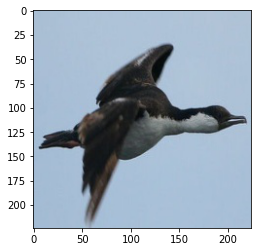

In [6]:
## This architecture is going to be loosley based on VGG.
## This is going to recieve a 32x32 images
## Block of code to explore the dataset
"""
A DirectoryIterator yields tuples of (x, y) 
where x is a numpy array containing a 
batch of images with shape (batch_size, *target_size, channels) 
and y is a numpy array of corresponding labels.
"""
for batches in train_data:
    batch = batches[0]
    for img in batch:
        plt.imshow(img)
        break
    break

## Model
We are using a convolutional neural network. This model makes use of the classical architecture "MobileNetV2" which has already been trained on the imagenet dataset. These trained weights to aid with the convolutional neural network model.

In [7]:
def build_model():
    base = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    base.trainable = False
    model = Sequential([
        base,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(250, activation="softmax")
        #Flatten(),
        #Dense(2048, activation="relu", kernel_initializer="he_normal"),
        #Dropout(0.35),
        #Dense(2048, activation="relu", kernel_initializer="he_normal"),
        #Dropout(0.35),
        #Dense(250, activation="softmax"),
    ])

    optim = Adam(1e-4)
    model.compile(optimizer=optim, loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [8]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 250)               320250    
                                                                 
Total params: 2,578,234
Trainable params: 320,250
Non-trainable params: 2,257,984
_________________________________________________________________


## Training 
Summary of the training process

In [9]:
history = model.fit(train_data, validation_data=valid_data, epochs=20, workers=10, use_multiprocessing=True)

Epoch 1/20
1101/1101 [==============================] - 86s 74ms/step - loss: 3.8064 - accuracy: 0.2994 - val_loss: 2.3197 - val_accuracy: 0.6688
Epoch 2/20
1101/1101 [==============================] - 83s 75ms/step - loss: 1.8918 - accuracy: 0.6793 - val_loss: 1.3069 - val_accuracy: 0.8264
Epoch 3/20
1101/1101 [==============================] - 80s 72ms/step - loss: 1.2505 - accuracy: 0.7805 - val_loss: 0.9007 - val_accuracy: 0.8808
Epoch 4/20
1101/1101 [==============================] - 83s 75ms/step - loss: 0.9478 - accuracy: 0.8282 - val_loss: 0.6888 - val_accuracy: 0.8944
Epoch 5/20
1101/1101 [==============================] - 81s 73ms/step - loss: 0.7716 - accuracy: 0.8530 - val_loss: 0.5652 - val_accuracy: 0.9112
Epoch 6/20
1101/1101 [==========================

In [10]:
%cd ~/cloudfiles/code/users/b8025187/assignment/task-2/ # do not run this

/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-csc8637-b8025187/code/users/b8025187/assignment/task-2


In [79]:
model.save("h5-model-2.h5")

INFO:tensorflow:Assets written to: model-2/assets
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


INFO:tensorflow:Assets written to: model-2/assets


**The model produces an accuracy of 95%**

In [72]:
%cd ~/localfiles/
model.evaluate(test_data, use_multiprocessing=True,workers=True)

/home/azureuser/localfiles
40/40 [==============================] - 3s 77ms/step - loss: 0.1939 - accuracy: 0.9544


[0.19388072192668915, 0.9544000029563904]

## Accuracy and Loss

- ### Ploting the train and validation loss

The training loss and validation both go down smoothly. There appears to be no overfitting

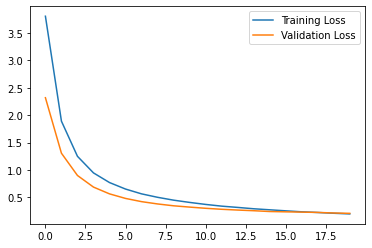

In [16]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


- ### Plotting the training accuracy and validation accuracy
From the graph shown below, there appears to be no overfitting. The validation accuracy is still increasing while the model is training

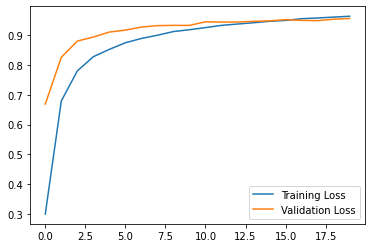

In [17]:
plt.plot(history.history["accuracy"], label="Training Loss")
plt.plot(history.history["val_accuracy"], label="Validation Loss")
plt.legend()
